


# 들어가며


**학습 전제**
___
- Convolution의 padding, stride 등의 기본 개념을 알고 있다.
- 교차 엔트로피(Cross Entropy) 등의 손실 함수, 최적화 함수 등 딥러닝의 기본적인 학습 알고리즘을 알고 있다.
- 텐서플로우를 활용해 신경망을 학습시키는 코드를 다뤄본 적이 있다.
- 간단한 판별 모델링(분류, 회귀 등)의 개념을 알고, 실습해 본 적이 있다.

**학습 목표**
___
- 생성 모델링 개념을 이해하며 판별 모델링과의 차이 알기
- Pix2Pix, CycleGAN 등의 이미지 관련 다양한 생성 모델링의 응용을 접하며 흥미 가지기
- Fashion MNIST 데이터셋의 의미를 알기
- 생성적 적대 신경망(GAN)의 구조와 원리를 이해하기
- 텐서플로우로 짠 DCGAN 학습 코드를 익히며 응용하기

**목차**
___
- 없던 데이터를 만들어낸다, 생성 모델링
- 여러 가지 생성 모델링 기법과 친해지기
- 패션을 디자인하려면? 먼저 패션을 배워야지!
- 그림을 만들어내는 화가 생성자(Generator), 그리고 평가하는 비평가 구분자(Discriminator)
- 생성 모델이 똑똑해지기 위한 기나긴 여정



# 1. Generative Modeling

지금까지는 **Discriminative Modeling(판별 모델링)**만을 배웠다. 이번 시간에는 **Generative Modeling(생성 모델링)**을 통해 실제 사진과 구별이 어려울 정도의 좋은 품질의 이미지를 만들어보는 것을 목표로 한다.

- 판별 모델: 입력된 데이터셋을 특정 기준에 따라 분류, 특정 값을 예측하는 모델
- 생성 모델: 학습 데이터셋과 비슷하면서 기존에는 없던 새로운 데이터셋을 생성하는 모델

생성 모델링에 대해 배워보기 전에, 실제로 최근 생성 모델은 어떤 것을 만들 수 있는지 AWS의 DeepComposer 시연 영상을 보고 시작하자.

[DeepComposer](https://youtu.be/XH2EbK9dQlg)

>> 참고: Generator가 일관되게 생성자로 번역되는 것에 비해, Discriminator는 번역자에 따라 판별자 또는 구분자 등으로 다양하게 번역되는 경향을 보인다. 여기서는 판별자라는 번역을 선택한다.

# 2. 여러 가지 생성 모델링 

생성모델에는 여러가지 기술들이 많다. 오늘은 이미지를 다루는 실습을 할 예정이므로, 이미지와 관련한 응용 생성 모델 기법만 살펴보자.


## (1) Pix2Pix

Pix2Pix는 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 사용되는 모델이다.

아래 그림처럼 단순화된 Input image와 Ground Truth가 쌍을 이루는 데이터셋으로 학습을 진행한다.

![](https://images.velog.io/images/och9854/post/8afcee92-8aa0-4eab-97d3-8b61e809d553/image.png)



왼쪽의 Input image를 입력받으면, 연산을 통해 predicted image가 출력된다. 이렇게 한 이미지를 다른 이미지로 픽셀 단위로 변환한다는 뜻에서 `Pixel to Pixel`을 딴 `Pix2Pix`로 이름이 붙게 되었다.

이런 Pix2Pix 기법이 응용될 수 있는 사례들은 다음 논문에서 그림으로 확인할 수 있다.

[논문](https://arxiv.org/pdf/1611.07004.pdf)


## (2) CycleGAN

Pix2Pix 이후로 CycleGAN이 발전되었다. 이 모델은 한 이미지와 다른 이미지를 번갈아 가며 Cyclic하게 변환시킬 수 있다.

- Pix2Pix는 한 방향으로의 변환만 가능하지만, CycleGAN은 양방향으로의 변환을 할 수 있다.
- Pix2Pix는 입력 데이터와 출력 데이터끼리 쌍으로 이루어진 데이터셋이 필요하지만, CycleGAN은 필요 없다.

![](https://images.velog.io/images/och9854/post/bd245183-66b3-433c-8135-0b99ea5d83a8/image.png)

![](https://images.velog.io/images/och9854/post/42ce08c4-faeb-49e9-8647-90fab1bb72d3/image.png)



딥러닝에서 쌍으로 된 데이터(paired data)가 필요없다는 것은 데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요없을을 뜻한다. 이는 굉장히 큰 장점이다.

## (3) Neural Style Transfer

Style Transfer라는 이름에서 알 수 있듯, 이 기법은 스타일을 변환시켜준다. 전체 이미지의 구성을 유지하고픈 **Base Image**와 입히고 싶은 스타일이 담긴 **Style Image** 두 장을 활용해서 새 이미지를 만들어낸다. `Neural`은 신경망, 즉 딥러닝 기술을 사용했다는 뜻을 가지고 있다.

![](https://images.velog.io/images/och9854/post/c1ef275c-af61-49d9-ad89-de7a045b7e27/image.png)


이렇게 style을 바꿀 수 있으며, 좌측 상단의 이미지가 Base Image이고, 나머지 다섯 개의 이미지에 작게 붙어 있는 이미지가 Style image이다. Base Image에서는 Content(내용)만, Style Image에서는 Style(스타일)만 추출해서 합친 결과물이다.

실제로 이 과정 속에는 다양한 최적화가 포함되어 있다. Base Image의 내용은 잃지 않으면서, Style Image의 스타일을 효과적으로 입히기 위한 정교한 손실 함수들이 짜여 있다. 추가로 궁금하다면 Neural Style Transfer를 검색해서 스타일 변환 결과와 원리를 찾아보는 걸 추천한다.

# 3. Fashion MNIST로 패션을 배우기

사람이 패션 디자이너가 되기 위해서 다양한 패션을 접하며 좋은 패션을 학습해 나만의 디자인을 완성하듯이, 생성 모델도 먼저 여러 패션을 접하며 옷, 신발, 드레스 등을 학습한 후 새로운 디자인을 만들어내야 한다.

오늘 사용할 데이터셋은 **Fashion MNIST**이다. [Fashion MNIST 링크](https://github.com/zalandoresearch/fashion-mnist)

- 이미지 크기는 (WxH)이다
- 데이터셋은 총 train 60000장, test 10000장으로 이뤄져있다.
- 총 10개의 카테고리가 0~9 숫자 라벨로 표시되어있다.
- Fashion MNIST가 만들어진 이유 3가지
   1. MNIST is too easy. (MNIST는 너무 쉽다.)
   2. MNIST is overused. (MNIST는 너무 많이 쓰였다.)
   3. MNIST can not represent modern CV tasks. (MNIST는 요즘의 Computer Vision 문제에 적용될 수 없다.)

먼저 신경망 구성에 필요한 텐서플로우, 이미지와 GIF를 다루는 데 쓰이는 imageio, display, matplotlib, PIL 패키지를 불러오자.

**라이브러리 설치 여부 확인**

```
$ pip list | grep -E 'imageio|Pillow'
```

**라이브러리가 없을 경우 설치**

```
$ pip install imageio
$ pip install Pillow
```

**작업 환경 구성**
```
$ mkdir -p ~/aiffel/dcgan_newimage/fashion/generated_samples
$ mkdir -p ~/aiffel/dcgan_newimage/fashion/training_checkpoints
$ mkdir -p ~/aiffel/dcgan_newimage/fashion/training_history
```


```python
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)
```

    tensorflow 2.6.0


`fashion_mnist` dataset은 인터넷 다운로드 필요없이, `tf.kears` 안에 있는 dataset에 이미 들어가 있어서 꺼내기만 하면 된다.

이후, `load_data()`로 데이터를 로딩해보자. 이번엔 분류 문제와 달리, 각 이미지가 어떤 카테고리인지 나타내주는 라벨이 필요없다! 즉 y_train, y_test 에 해당하는 데이터를 사용하지 않는다.


```python
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, _), (test_x, _) = fashion_mnist.load_data()
# type(train_x) # numpy.ndarray
```

[파이썬 언더스코어(_)에 대하여](https://mingrammer.com/underscore-in-python/#2-%EA%B0%92%EC%9D%84-%EB%AC%B4%EC%8B%9C%ED%95%98%EA%B3%A0-%EC%8B%B6%EC%9D%80-%EA%B2%BD%EC%9A%B0)


```python
# 각 픽셀은 0~255 사이 정수값을 가진다.
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())
```

    max pixel: 255
    min pixel: 0



```python
# 이후 각 픽셀을 -1, 1로 정규화시키자!
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())
```

    max pixel: -0.99215686
    min pixel: -1.0078431



```python
train_x.shape
```




    (60000, 28, 28)



60000장, 28x28을 확인할 수 있다. 앞서 CNN 계층을 다룰 때 배웠듯, 딥러닝에서 이미지를 다루려면 **채널 수**에 대한 차원이 필요하다. Fashion MNIST는 흑백 이미지이므로 채널 값은 1이다.


```python
# dataset shape 마지막에 1을 추가해주자.
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
train_x.shape
```




    (60000, 28, 28, 1)




```python
# data가 어떻게 생긴지 확인하기

plt.figure(figsize=(10, 12)) # 이미지 전체 프레임의 크기 결정

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, train_x.shape[0]) # (1, 60000) 사이 정수
    plt.imshow(train_x[random_index].reshape(28, 28), cmap='gray')
    plt.title(f'index: {random_index}')
    plt.axis('off')
plt.show()

```


![](https://images.velog.io/images/och9854/post/6e2ebfd5-17e2-4d2f-91d6-410c29f1fc95/output_11_0.png)



데이터에 대한 전처리를 모두 마쳤다. 이렇게 정리된 데이터를 모델에 넣어서 학습시켜야 하니, 편하게 사용하도록 텐서플로우의 `Dataset`을 이용해 준비해두자. 이를 이용하면 매번 모델에게 직접 섞어서 넣어주지 않아도 된다!!


```python
BUFFER_SIZE = 60000
BATCH_SIZE = 256
```

전체 데이터를 섞기 위해 60,000으로 설정하자. `shuffle()`함수가 데이터셋을 잘 섞어서 모델에 넣어줄 것이다!

[텐서플로우 공식 문서 shuffle: tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)


> 📖 **Buffer size** is the number of samples (which corresponds to the amount of time) it takes for your computer to process any incoming signal.      
> For perfect shuffling, set the buffer size equal to the full size of the dataset.


```python
# train_x라는 넘파이 배열형 자료를 섞고, 이를 BATCH_SIZE에 따라 나눈다.
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
```

tf.data.Dataset 모듈의 `from_tensor_slices()` 함수를 사용하면 리스트, 넘파이, 또는 텐서플로우의 텐서 자료형에서 데이터셋을 만들 수 있다.

# 4. 화가 생성자, 비평가 반펼자

## (1) GAN 이해하기

앞서 본 생성 모델들은 꽤나 발전된 형태의 생성 모델링 기법이다. 우린 간단한 형태의 생성모델인 GAN(Generative Adversarial Network)부터 시작해보자. GAN은 2014년 Ian Goodfellow라는 연구자에 의해 처음 나온 네티워크로, 발표된 후 독특하면서도 직관적인 아이디어로 많은 인기를 얻은 모델이다.

- **생성자(Generator)**는 아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성한다. 즉, 무에서 유를 창조하는 것과 같은 역할을 한다.
- **판별자(Discriminator)**는 기존에 있던 진짜 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real 인지, Fake 인지에 대한 판단 정도를 실숫값으로 출력한다.

Ian Goodfellow가 처음 GAN을 발표했을 때는 이 두 네트워크를 다음과 같이 비유했다.

> "In the proposed adversarial nets framework, the generative model is pitted against an adversary: a discriminative model that learns to determine whether a sample is from the model distribution or the data distribution. The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistiguishable from the genuine articles." (출처 : https://arxiv.org/pdf/1406.2661.pdf)


![](https://images.velog.io/images/och9854/post/21eb64e0-a93c-46bf-bb60-4b12dff833bb/image.png)

추가로 더 알아보고 싶다면 2016년의 OpenAI글을 읽어보자. [Generative Models - openai](https://openai.com/blog/generative-models/)

## (2) 생성자 구현하기



코드로 모델을 어떻게 구현할지 확인해보자.

DCGAN을 구현해볼 예정이며, DCGAN 이후 발표된 수많은 GAN 기반 이미지 생성 모델들은 대부분 DCGAN 모델을 발전시킨 형태이므로, 그 구조를 살펴보고 구현 연습을 해보는 게 의미있을 것이다.

Keras Sequential API를 활용하자.

코드는 [Tensorflow 2.0 Tutorial의 DCGAN 구현](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)을 기반으로 하였다.



```python
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((7, 7, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

```

make_generator_model이라는 함수를 만들어 언제든 생성자를 생성할 수 있게 하였다. 여기서 중요한 레이어는 Conv2DTranspose layer이다. Conv2DTranspose 층은 일반적인 Conv2D와 반대로 이미지 사이즈를 넓혀주는 층이다.

이 모델에서는 `(7, 7, 256) → (14, 14, 64) → (28, 28, 1)` 순으로 이미지를 키워나간다.

[What is Transposed Convolutional Layer?](https://towardsdatascience.com/what-is-transposed-convolutional-layer-40e5e6e31c11)

레이어 사이사이에 `BatchNormalization` 레이어가 반복되는 걸 확인할 수 있는데, 이는 신경망의 가중치 값을 정규화시켜준다.

마지막 층에서는 활성화 함수로 tanh를 사용하는데, 이는 우리가 `-1 ~ 1` 범위의 값으로 픽셀 값을 정규화시켰던 데이터셋과 동일하게 하기 위해서이다.

[Batch Normalization](https://eehoeskrap.tistory.com/430)

[활성화 함수 (activation function)](https://newly0513.tistory.com/20)

모델은 입력값으로 (batch_size, 100) 형상의 노이즈 벡터를 받는다. 이는 7x7x256개의 노드를 가진 첫 번째 Dense layer를 거치며 (batch_size, 12544)형상의 벡터가 된다.

이후 reshape 레이어를 지나서 conv 연산이 가능하도록 (7,7,256) 벡터로 변환된다.


```python
# 모델을 generator라는 변수로 호출
generator = make_generator_model()

generator.summary()
```

    Model: "sequential_2"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense_2 (Dense)              (None, 12544)             1254400   
    _________________________________________________________________
    batch_normalization_3 (Batch (None, 12544)             50176     
    _________________________________________________________________
    leaky_re_lu_5 (LeakyReLU)    (None, 12544)             0         
    _________________________________________________________________
    reshape_1 (Reshape)          (None, 7, 7, 256)         0         
    _________________________________________________________________
    conv2d_transpose_3 (Conv2DTr (None, 7, 7, 128)         819200    
    _________________________________________________________________
    batch_normalization_4 (Batch (None, 7, 7, 128)         512       
    _________________________________________________________________
    leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)         0         
    _________________________________________________________________
    conv2d_transpose_4 (Conv2DTr (None, 14, 14, 64)        204800    
    _________________________________________________________________
    batch_normalization_5 (Batch (None, 14, 14, 64)        256       
    _________________________________________________________________
    leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 64)        0         
    _________________________________________________________________
    conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         1600      
    =================================================================
    Total params: 2,330,944
    Trainable params: 2,305,472
    Non-trainable params: 25,472
    _________________________________________________________________


`shape=(1,100)` 형상의 랜덤 노이즈 벡터를 생성해 결과물을 만들어보자.


```python
noise = tf.random.normal([1, 100])
```

레이어와 모델에 call method가 구현되어 있기 때문에, 방금 만들어진 생성자 모델에 입력값으로 노이즈를 넣고 바로 모델을 호출하면 간단히 결과 이미지가 생성된다.

> 📖 call 메서드를 구현했다는 게 무슨말일까?   
 The __call__ method enables Python programmers to write classes where the instances behave like functions and can be called like a function. When the instance is called as a function; if this method is defined, x(arg1, arg2, ...) is a shorthand for x.__call__(arg1, arg2, ...).
 
또한, 현재 학습하는 중이 아니니 training = False를 주어야 한다. Batch Normalization layer는 훈련 시기와 추론 시기의 행동이 다르기 때문에 `training=False`를 주어야 올바른 결과를 얻을 수 있다.


```python
generated_image = generator(noise, training=False)
generated_image.shape # TensorShape([1, 28, 28, 1])
```




    TensorShape([1, 28, 28, 1])




```python
# 0, 3번째 축의 인덱스를 0으로 설정해 28x28 shape image만 보기!(∵ matplotlib은 2차원 이미지만 볼 수 있다)

plt.imshow(generated_image[0, :, :, 0], cmap='gray') 
plt.colorbar()
plt.show()
```


![](https://images.velog.io/images/och9854/post/0014e56f-9c31-483a-9533-98f1efd68591/output_25_0.png)



적당히 -1 ~ 1 범위에서 값이 생성된 것을 확인할 수 있다.

## (3) 판별자 구현하기

판별자는 fake, real image를 받았을 때 각 이미지 별로 '진짜라고 판단하는 정도' 값을 출력해야 한다.

- input: (28,28,1) image
- output: a number which judges reality


```python
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model


```


Conv2DTranspose로 이미지를 키웠던 생성자와 반대로, 판별자는 Conv2D layer로 이미지 크기를 점점 줄여나간다.

마지막엔 Flatten layer로 (1,7x7x128) 형상의 벡터를 반환한다.


```python
discriminator = make_discriminator_model()

discriminator.summary()
```

    Model: "sequential_3"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_2 (Conv2D)            (None, 14, 14, 64)        1664      
    _________________________________________________________________
    leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 64)        0         
    _________________________________________________________________
    dropout_2 (Dropout)          (None, 14, 14, 64)        0         
    _________________________________________________________________
    conv2d_3 (Conv2D)            (None, 7, 7, 128)         204928    
    _________________________________________________________________
    leaky_re_lu_9 (LeakyReLU)    (None, 7, 7, 128)         0         
    _________________________________________________________________
    dropout_3 (Dropout)          (None, 7, 7, 128)         0         
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 6272)              0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 1)                 6273      
    =================================================================
    Total params: 212,865
    Trainable params: 212,865
    Non-trainable params: 0
    _________________________________________________________________



```python
# 생성했던 가짜 이미지를 판별자에 입력해보기

decision = discriminator(generated_image, training=False)
decision
```




    <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00234567]], dtype=float32)>



# 5. 손실함수와 최적화 함수

모델학습을 위해 loss function과 optimizer을 준비하자.

## (1) loss function
주로 Cross Entropy를 사용한다. $\because$ 판별자는 한 개의 이미지가 `가짜인지 진짜인지` 나타내는 2개 클래스 간 분류 문제를 풀어야 하기 때문에, binary cross entropy를 사용한다.

- real image label = 1
- fake image label = 0

- 생성자 : 판별자가 Fake Image에 대해 판별한 값, 즉 D(fake_image) 값이 1에 가까워지는 것
- 판별자 : Real Image 판별값, 즉 D(real_image)는 1에, Fake Image 판별값, 즉 D(fake_image)는 0에 가까워지는 것

결국 손실함수에 들어가는 값은 모두 `판별자의 판별값`이 된다!

하지만, 판별자 모델의 맨 마지막 layer에는 값을 정규화시키는 sigmoid/tanh 함수와 같은 활성화 함수가 없다. 즉, 출력값은 **모든 실숫값을 가지게 된다.**

그런데, tf.kears.losses의 `BinaryCrossEntropy` 클래스는 인풋을 0 ~ 1로 주어야 한다. 따라서 **`from_logits`를 True로 설정하여 입력값을 함수 내부에서 sigmoid 함수를 사용해 0 ~ 1 사이 값으로 정규화한 후 계산시켜야 한다.**



```python
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
```

이제 계산된 loss들은 fake_output, real_output을 이용한다.

- fake_output : 생성자가 생성한 Fake Image를 구분자에 입력시켜서 판별된 값, 즉 `D(fake_image)`
- real_output : 기존에 있던 Real Image를 구분자에 입력시켜서 판별된 값, 즉 `D(real_image)`
    
fake_output,real_output을 각각 1, 0에 비교해야 한다. `tf.ones_like()`와 `tf.zeros_like()`를 활용하자.

## (2) generator_loss

fake_output이 1에 가까워지기를 바라므로, 다음과 같이 tf.ones_like()와 교차 엔트로피 값을 계산하면 된다.


```python
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)
```

## (3) discriminator_loss
real_output은 1에 가까워지게, fake_output은 0에 가까워지게 하자.


```python
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
```

## (4) discriminator accuracy

판별자가 real/fake output을 accuracy가 1.0에 가깝게 판단하면 좋을 것일까? 그렇지 않다.

이 경우 생성자가 만들어내는 fake output이 real output과 차이가 많이 나기 때문에 판별자가 매우 쉽게 판별해 내고 있다는 뜻이다. 이상적인 수치는 두 accuracy 모두가 0.5에 가까워지는 것이다.


```python
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy
```

위 함수 안에 사용된 tensorflow 함수들의 역할을 순차적으로 예를 들어 정리하면 다음과 같다.

ex.) real_output = tf.Tensor([0.2, 0.4, 0.7, 0.9]) 라면,

1) tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별 - >> tf.Tensor([False, False, True, True])   
2) tf.cast( (1), tf.float32) : (1)의 결과가 True이면 1.0, False이면 0.0으로 변환 - >> tf.Tensor([0.0, 0.0, 1.0, 1.0])   
3) tf.reduce_mean( (2)) : (2)의 결과를 평균내어 이번 배치의 정확도(accuracy)를 계산 - >> 0.5   

## Optimizer

이번에는 Adma 최적화 기법을 활용해보자.

- [문과생도 이해하는 딥러닝 (8) - 신경망 학습 최적화](https://sacko.tistory.com/42)

learning rate는 0.0001로 설정할텐데, 학습 품질을 올리려면 값을 바꿔가며 학습을 진행해보길 바란다.

> 중요: 생성자/구분자는 개별적으로 학습을 진행하는 네트워크이기 때문에 optimizer를 따로 생성해주어야 한다.


```python
# learning rate 바꿔보기!
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
```


```python
# 샘플 16장, 고정된 seed noise 생성(∵ 동일한 노이즈로 생성해야 진전 과정을 확인 가능함)

noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape
```




    TensorShape([16, 100])



# 6. 훈련과정 설계

하나의 미니 배치당 진행할 train_step 함수를 만들자.

`@tf.decorator`를 붙여서 사용하자. 데코레이터는 우리가 직접 session을 열어 학습했다가, 학습이 완료되면 닫아주는 등의 번거로운 과정을 내부적으로 처리해서 학습시키기 편하게 해준다.

- [python decorator (데코레이터) 어렵지 않아요](https://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%BD%94%EB%A0%88%EC%9D%B4%ED%84%B0-decorator/)



> [참고](https://www.tensorflow.org/api_docs/python/tf/function)📖 tf.function : Compiles a function into a callable TensorFlow graph

아래 코드는 decorator와 zip, *args, ***kargs, 퍼스트 클래스 함수, closer 연습한 것이다

```python
# def decorator_function(original_function):
#     def wrapper_function(*args, **kwargs):
#         print '{} 함수가 호출되기전 입니다.'.format(original_function.__name__)
#         return original_function(*args, **kwargs)
#     return wrapper_function


class DecoratorClass:  # 1
    def __init__(self, original_function):
        self.original_function = original_function

    def __call__(self, *args, **kwargs):
        print('{} 함수가 호출되기전 입니다.'.format(self.original_function.__name__))
        return self.original_function(*args, **kwargs)


@DecoratorClass  # 2
def display():
    print('display 함수가 실행됐습니다.')


@DecoratorClass  # 3
def display_info(*args, **kargs):

    for name, age in zip(args, kargs.values()):
        print('display_info({}, {}) 함수가 실행됐습니다.'.format(name, age))


display()
print()
display_info('John', 'Smae', age1=25, age2=30)
```


- 추가로 아래 두 코드를 비교해보면 이해가 더 잘 갈 것이다.


```python
import numpy as np
import tensorflow as tf

def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)
```

    <class 'numpy.ndarray'>
    <class 'numpy.ndarray'>





    array([7, 7])




```python
import numpy as np
import tensorflow as tf

@tf.function    # 위와 동일한 함수이지만 @tf.function 데코레이터가 적용되었습니다.
def f(x, y):
  print(type(x))
  print(type(y))
  return x ** 2 + y

x = np.array([2, 3])
y = np.array([3, -2])
f(x, y)
```

    <class 'tensorflow.python.framework.ops.Tensor'>
    <class 'tensorflow.python.framework.ops.Tensor'>





    <tf.Tensor: shape=(2,), dtype=int64, numpy=array([7, 7])>



@tf.function 데코레이터가 사용된 함수에 입력된 입력은 Tensorlow의 graph node가 될 수 있는 타입으로 자동 변환된다. 알아두면 향후 Tensorflow 모델 구현에 매우 편리하게 사용할 수 있을 것이다.

> ❔ graph 노드가 무엇인가? [tensorflow.org 참고](https://www.tensorflow.org/guide/intro_to_graphs#what_are_graphs)   
 Graphs are data structures that contain a set of tf.Operation objects, which represent units of computation; and tf.Tensor objects, which represent the units of data that flow between operations.
 
> ❔ Benefits of graphs   
The benefits of graphs
With a graph, you have a great deal of flexibility. You can use your TensorFlow graph in environments that don't have a Python interpreter, like mobile applications, embedded devices, and backend servers. TensorFlow uses graphs as the format for saved models when it exports them from Python.



```python
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

```

train_step 함수를 하나하나 뜯어보면 다음과 같다.

- (1) 입력 데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음
- (2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
- (3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
- (4) generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성
- (5) discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력
- (6) loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
- (7) accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산
- (8) gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
- (9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신
- (10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴
이러한 일련의 과정을 통해 한 번의 train_step이 끝나게 된다.

그러면, 이렇게 한 단계씩 학습할 train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수를 만들어 보자.
아까 만들어 놓았던 고정된 seed를 이용해서 결과물을 만들어내므로, 고정된 seed에 대한 결과물이 얼마나 나아지고 있는지를 확인할 수 있다.


> ❔ GradientTape()란 무엇인가? [참고: org (tape 검색)](https://www.tensorflow.org/guide/autodiff#:~:text=to%20compute%20gradients.-,Gradient%20tapes,Variable%20s.&text=TensorFlow%20then%20uses%20that%20tape,computation%20using%20reverse%20mode%20differentiation.)   
> ❕ TensorFlow provides the tf.GradientTape API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually tf.Variables. TensorFlow "records" relevant operations executed inside the context of a tf.GradientTape onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

> ❔ 왜 사용하는가?    [rfriend](https://rfriend.tistory.com/556)   
> ❕ 즉시실행모드(eager mode)에서는 Loss를 "바로 즉시 계산(eager execution)" 해버리기 때문에, 이를 자동미분 하려면 문제가 생긴다(자동미분을 위한 함수, 계산 식의 연산과정과 입력 값에 대한 정보가 즉시실행모드에는 없다). 중간 연산 과정(함수, 연산)을 테이프에 차곡차곡 기록해주기 위해서!


```python
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()
```

학습 과정을 체크하기 위해 시각화해 보아야 할 것은 loss와 accuracy 그래프이다. GAN의 학습 과정은 지도학습 모델보다 까다로운데, 이것은 두 모델이 서로의 학습 과정에 영향을 주기 때문이다. 

train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수를 만들어보자.


```python
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()
```

다음은 정기적으로 모델을 저장하기 위해 checkpoint를 만들어주자.

tf.train.Checkpoint를 활용하면 매번 모델을 직접 저장해 주지 않아도, 코드 한 줄로 빠르고 편하게 버전 관리를 할 수 있다. 모델이 복잡해지고 학습 속도가 오래 걸릴수록, 모델에 대한 저장 및 버전 관리는 필수이다!

checkpoint에는 optimizer와 생성자, 판별자를 모두 넣어 저장한다. 정확히는 생성자와 판별자가 학습한 모델 가중치를 저장하는 것이다.


```python
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
```

# 7. 학습 시키기

train stp, generate and save imagess, draw train history, checkpoint까지 모두 합치자!


```python
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)
        
```


```python
이제 모델을 저장하는 간격을 담당하는 `save_every`와 epoch을 설정 후 학습시키자!
```


```python
save_every =5
EPOCHS = 10

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")
```




    [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]




```python
#save_every = 200
#EPOCHS = 1000

%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.
```


![](https://images.velog.io/images/och9854/post/715958ad-8bd1-4de7-915c-b130be52b51b/output_58_0.png)


    Time for training : 16937 sec



![](https://images.velog.io/images/och9854/post/1fabcd95-2c5c-425b-a815-e818ecdf463f/output_58_2.png)


    CPU times: user 2h 34min 21s, sys: 19min 57s, total: 2h 54min 19s
    Wall time: 4h 42min 28s


## (1) 학습과정 시각화하기

imageio 라이브러리를 통해 GIF로 만들어보자.

`imagetio.get_writer`를 활용해서 파일을 열고, `append_data`로 이미지를 하나씩 붙여나가는 방식이다.

아래 코드가 무사히 실행되면, fashion_mnist_dcgan.gif 파일이 저장될 것이다.


```python
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif
```

    -rw-r--r-- 1 root root 1532177 Feb  9 00:51 /aiffel/aiffel/dcgan_newimage/fashion/fashion_mnist_dcgan.gif


클라우드에서는 확인을 위하여 cloud jupyrer를 열어서 ~/aiffel/dcgan_newimage/fashion/ 폴더 경로에 fashion_mnist_dcgan.gif를 클릭하시면 생성자가 만들어내는 이미지의 품질이 점점 개선되어 가는 과정을 한눈에 볼 수 있다


```python

```




```python

```

# project

# 프로젝트: CIFAR 10 이미지 생성하기

GAN을 학습하는 과정은 보기보다 까다롭습니다. 모델 구조, learning_rate, 파라미터 초기화, 생성자와 판별자의 경쟁 관계, 데이터의 특성 등 고려해야 할 것이 참 많습니다.

이번에는 앞에서 배운 FASHION-MNIST 데이터 생성용 DCGAN 모델구조를 이용해서 CIFAR-10 데이터를 생성하는 모델을 직접 만들어 봅시다.
모델 구현 및 학습의 전과정의 흐름은 거의 비슷하겠지만, 아래와 같이 몇 가지 달라지는 점이 있습니다.

- 이미지 데이터의 shape가 (28, 28, 1)에서 (32, 32, 3)으로 변경됩니다. 생성자, 판별자 모델의 입출력 shape 및 모델 구조에 영향이 있습니다.
- 이미지가 단색의 grayscale에서 RGB 3채널의 컬러이미지로 변경됩니다. 시각화 과정에서 고려할 점이 있습니다.
- 입력데이터 전체 차원이 3~4배 증가하면서, 학습이 진행되는 양상이 다소 달라집니다.

# STEP 1. 작업환경 구성하기
다음과 같이 작업환경을 구성합시다.
```python
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/generated_samples
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_checkpoints
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_history
```

# STEP 2. 데이터셋 구성하기
CIFAR-10 데이터셋도 tf.keras 안에 있는 datasets에 포함되어 있어서, 아래와 같이 손쉽게 데이터셋을 구성할 수 있습니다.

- 학습에 사용할 train_x의 이미지를 -1, 1로 정규화합니다.
- 로드한 학습 데이터를 시각화를 통해 확인해 봅시다.
- tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하여 미니배치 데이터셋을 구성해 봅시다.
학습 시간이 너무 오래 걸린다면 한 종류의 데이터만 추출해 진행해도 좋습니다. 아래 코드는 참고만 하세요.

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("tensorflow", tf.__version__)

tensorflow 2.6.0


In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

(50000, 32, 32, 3)

In [3]:
# check data
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [4]:
# 이후 각 픽셀을 -1, 1로 정규화시키자!
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [5]:
train_x.shape

(50000, 32, 32, 3)

In [7]:
# dataset shape 마지막에 1을 추가해주자.
train_x = train_x.reshape(train_x.shape[0], 32, 32, 3).astype('float32')
train_x.shape, train_x[0].shape

((50000, 32, 32, 3), (32, 32, 3))

In [8]:
train_nomal_x = ((127.5 * train_x) + 127.5).astype(np.int32)

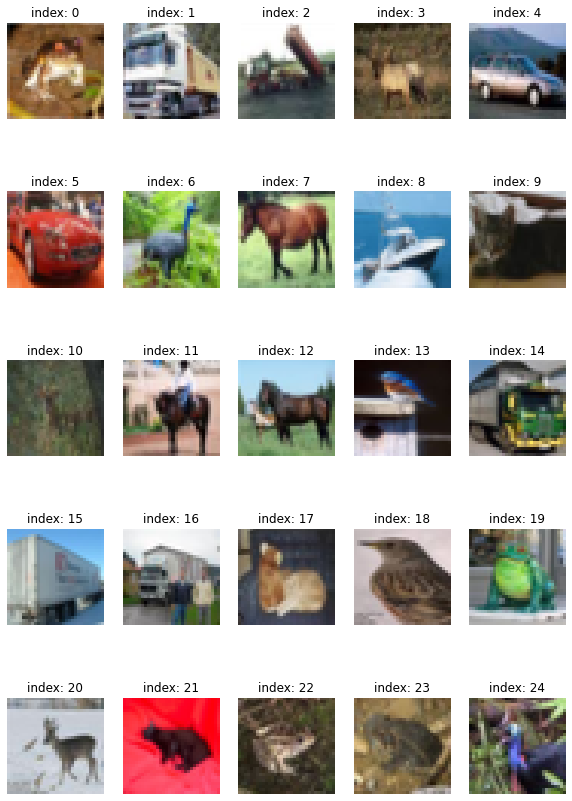

In [9]:
# data가 어떻게 생긴지 확인하기

plt.figure(figsize=(10, 15)) # 이미지 전체 프레임의 크기 결정

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_nomal_x[i].reshape(32,32,3))
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

In [11]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

# train_x라는 넘파이 배열형 자료를 섞고, 이를 BATCH_SIZE에 따라 나눈다.
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# STEP 3. 생성자 모델 구현하기
- (32, 32, 3)의 shape를 가진 이미지를 생성하는 생성자 모델 구현 함수를 작성해 봅시다.
- noise = tf.random.normal([1, 100])로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지를 생성해 봅시다.
- 생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인해 봅시다.

In [15]:
# 이 모델에서는 (8, 8, 256) → (16, 16, 64) → (32, 32, 1) 순으로 이미지를 키워나간다.



def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

In [16]:
# 모델을 generator라는 변수로 호출
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

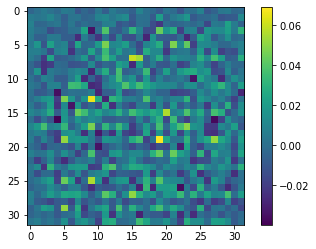

In [17]:
# noise 벡터로 체크
noise = tf.random.normal([1, 100])

# generator 생성
generated_image = generator(noise, training=False)
generated_image.shape # TensorShape([1,32,32, 1])

# 이미지 체크
plt.imshow(generated_image[0, :, :, 0]) 
plt.colorbar()
plt.show()

# STEP 4. 판별자 모델 구현하기
- (32, 32, 3)의 이미지를 입력으로 받아 1dim을 판별결과를 출력하는 판별자 모델 구현 함수를 작성해 봅시다.
- 위 STEP 2에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인해 봅시다

In [18]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32,32,3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model


In [19]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [20]:
# 생성했던 가짜 이미지를 판별자에 입력해보기

decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00185728]], dtype=float32)>

# STEP 5. 손실함수와 최적화 함수 구현하기
- 생성자와 판별자의 손실함수(loss)를 구현해 봅시다.
- 판별자의 출력값을 가지고 실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수를 구현해 봅시다.
- 생성자와 판별자를 최적화하는 optimizer를 정의합니다.

In [22]:
# loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [23]:
# generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [24]:
# discriminator_loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [25]:
# discriminator_acc
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [50]:
# optimizer
# learning rate 바꿔보기!
lr = 3e-4
generator_optimizer = tf.keras.optimizers.Adam(lr)
discriminator_optimizer = tf.keras.optimizers.Adam(lr)

In [51]:
# 샘플 16장, 고정된 seed noise 생성(∵ 동일한 노이즈로 생성해야 진전 과정을 확인 가능함)

noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

# STEP 6. 훈련과정 상세 기능 구현하기
- 1개 미니배치의 훈련 과정을 처리하는 train_step() 함수를 구현해 봅시다.
- 16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 generate_and_save_images() 함수를 구현해 봅시다.
- 훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 draw_train_history() 함수를 구현해 봅시다.
- training_checkpoints 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정해 봅시다.

In [52]:
# train_step function

@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값


In [53]:
# generate images

def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [54]:
# visualize train_history

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [55]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# STEP 7. 학습 과정 진행하기
- 위 STEP 5에서 구현한 기능들을 활용하여 최소 50 epoch만큼의 모델 학습을 진행해 봅시다.
- 학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현해 봅시다.
- 학습 과정을 담은 샘플 이미지, gif 파일, 학습 진행 그래프 이미지를 함께 제출합니다.
- (참고) 학습 과정 중 학습 epoch를 추가 진행해야 하거나, 학습한 모델을 활용하여 이미지를 생성할 필요가 생깁니다. 그럴 때마다 모델 학습을 처음부터 다시 진행한다면 시간 낭비가 될 것입니다.
- 우리는 위에서 checkpoint 모듈을 이용해 모델을 저장해 둔 바 있습니다. 이를 이용해 학습해 둔 모델을 로드하면 모델 재학습이 필요 없이 이런 작업을 진행할 수 있습니다.
- 아래는 checkpoint 모듈을 활용하여 모델을 로드하는 예시입니다.

In [70]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)
        

In [73]:
save_every = 100
EPOCHS = 10

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

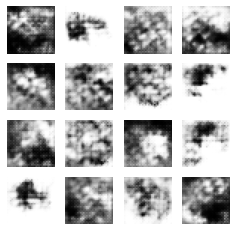

Time for training : 148 sec


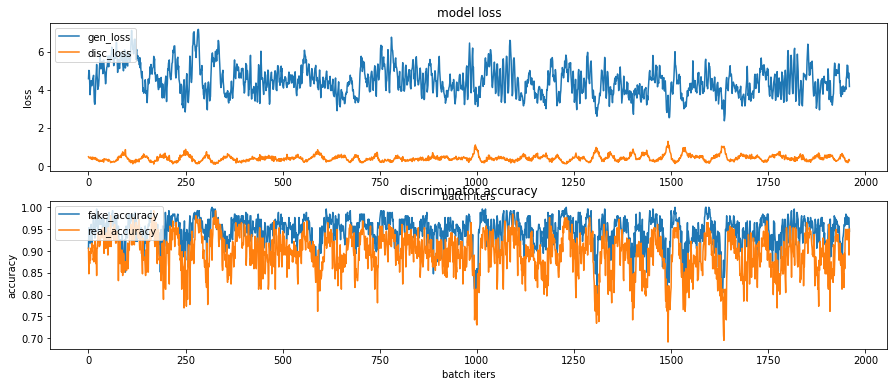

CPU times: user 2min 36s, sys: 12.8 s, total: 2min 49s
Wall time: 2min 29s


In [74]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

In [75]:
save_every = 1000
EPOCHS = 50

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

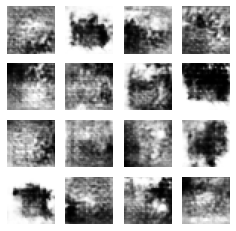

Time for training : 758 sec


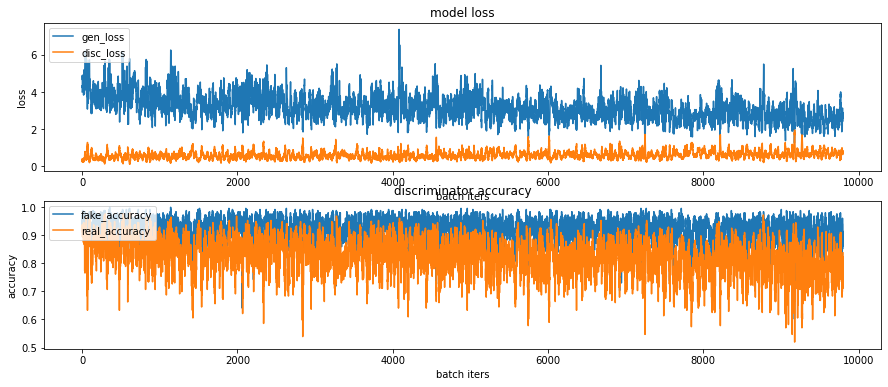

CPU times: user 13min 7s, sys: 1min 4s, total: 14min 11s
Wall time: 12min 39s


In [76]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

In [77]:
save_every = 1000
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

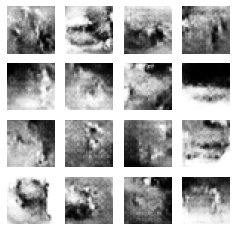

Epoch 81 | iter 151
Time for epoch 81 : 11 sec


In [ ]:
%%time
train(train_dataset, EPOCHS, save_every)

# 학습과정의 loss, accuracy 그래프 이미지 파일이 ~/aiffel/dcgan_newimage/fashion/training_history 경로에 생성되고 있으니
# 진행 과정을 수시로 확인해 보시길 권합니다.

 checkpoint를 통해 모델이 로드되었으면 아래 코드를 실행할 경우 로드된 모델의 파라미터 상태에서 훈련을 재개할 수도 있습니다.
 
```
%%time
train(train_dataset, EPOCHS, save_every)
```

# STEP 8. (optional) GAN 훈련 과정 개선하기
- STEP 6을 진행하면서 생성된 샘플 이미지, 학습 과정 그래프 등을 통해 이전 훈련 과정의 문제점을 분석해 봅시다.
- 모델구조 또는 학습 과정을 개선한 내역과 그 결과(샘플 이미지, 학습 과정 그래프 포함)를 함께 제출합니다.

(참고) 아래 언급된 페이지들에서 개선을 위한 아이디어를 얻을 수 있을 것입니다.

- [How to Train a GAN? Tips and tricks to make GANs work](https://github.com/soumith/ganhacks)    
- [10 Lessons I Learned Training GANs for one Year](https://towardsdatascience.com/10-lessons-i-learned-training-generative-adversarial-networks-gans-for-a-year-c9071159628)    
- [Tips for Training Stable Generative Adversarial Networks](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/)    
- [Improved Techniques for Training GANs(paper)](https://papers.nips.cc/paper/6125-improved-techniques-for-training-gans.pdf)    

In [ ]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/cifar10_dcgan/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif

# 학습 중 ckpt 모듈로 모델을 저장해두었을 때, 학습된 모델을 로드하는 방법

checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator


# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
for i in range(25):
    plt.subplot(5, 5, i+1)

    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
    
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.



# 회고
1. 이번 프로젝트에서 어려웠던 점

GAN을 이해하는 게 어려웠다. loss, accuracy 설정하는 부분이 특히 어려웠다.


2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점.

버퍼 사이즈, call 메서드, 데코레이터, 클로져, 퍼스트클래스 함수, 그리고 GradientTape() 메서드에 대해서도 알게 되었다. 위에 정리해 두었다.

3. 루브릭 평가 지표를 맞추기 위해 시도한 것들

lr, epoch, batch size를 바꿔가며 학습을 시켜 loss가 감소하는 것을 육안으로 확인할 수 있었다.
